[View in Colaboratory](https://colab.research.google.com/github/priyasin01/priyahelloworld/blob/master/WORDCLOUD%20GENERATION.ipynb)

In [1]:
!pip install wordcloud


    100% |████████████████████████████████| 368kB 8.7MB/s 


In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [0]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [0]:
drive_service = google_authenticate()

In [0]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

In [0]:
text_file = read_file('1Zgq0tdAWabGIDPHjwrh545NNEuWCFNbU') # file id of the picture

In [32]:
document = text_file.read()
print(len(document))
print(document[0:100])
document=document.decode("utf-8")
print(type(document))

262
b'Hello! I am Priya Singh.\r\nI am Happy go lucky kind of person.\r\nHow are you?\r\nDoing good or not?\r\nDo '
<class 'str'>


(-0.5, 399.5, 199.5, -0.5)

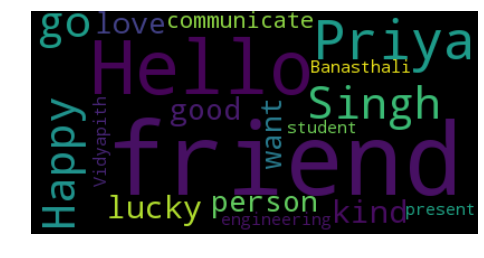

In [33]:
wordcloud = WordCloud().generate(document)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")